In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt



In [5]:
data = pd.read_csv(r"C:\Users\student\Downloads\titanic.csv")
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print(data.columns)
print(data.isnull().sum())



Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [9]:
data = data.copy()
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True, errors='ignore')


In [10]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)


In [11]:
X = data.drop(['Survived', 'PassengerId'], axis=1, errors='ignore')
y = data['Survived']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [14]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179

Confusion matrix:
 [[96  9]
 [27 47]]


In [15]:
import pandas as pd
feat_imp = pd.DataFrame({"feature": X.columns, "importance": model.feature_importances_})
feat_imp.sort_values("importance", ascending=False, inplace=True)
print(feat_imp)


      feature  importance
5    Sex_male    0.509011
0      Pclass    0.240393
1         Age    0.109746
4        Fare    0.077543
2       SibSp    0.051463
7  Embarked_S    0.011843
3       Parch    0.000000
6  Embarked_Q    0.000000


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/titanic_tree.png'

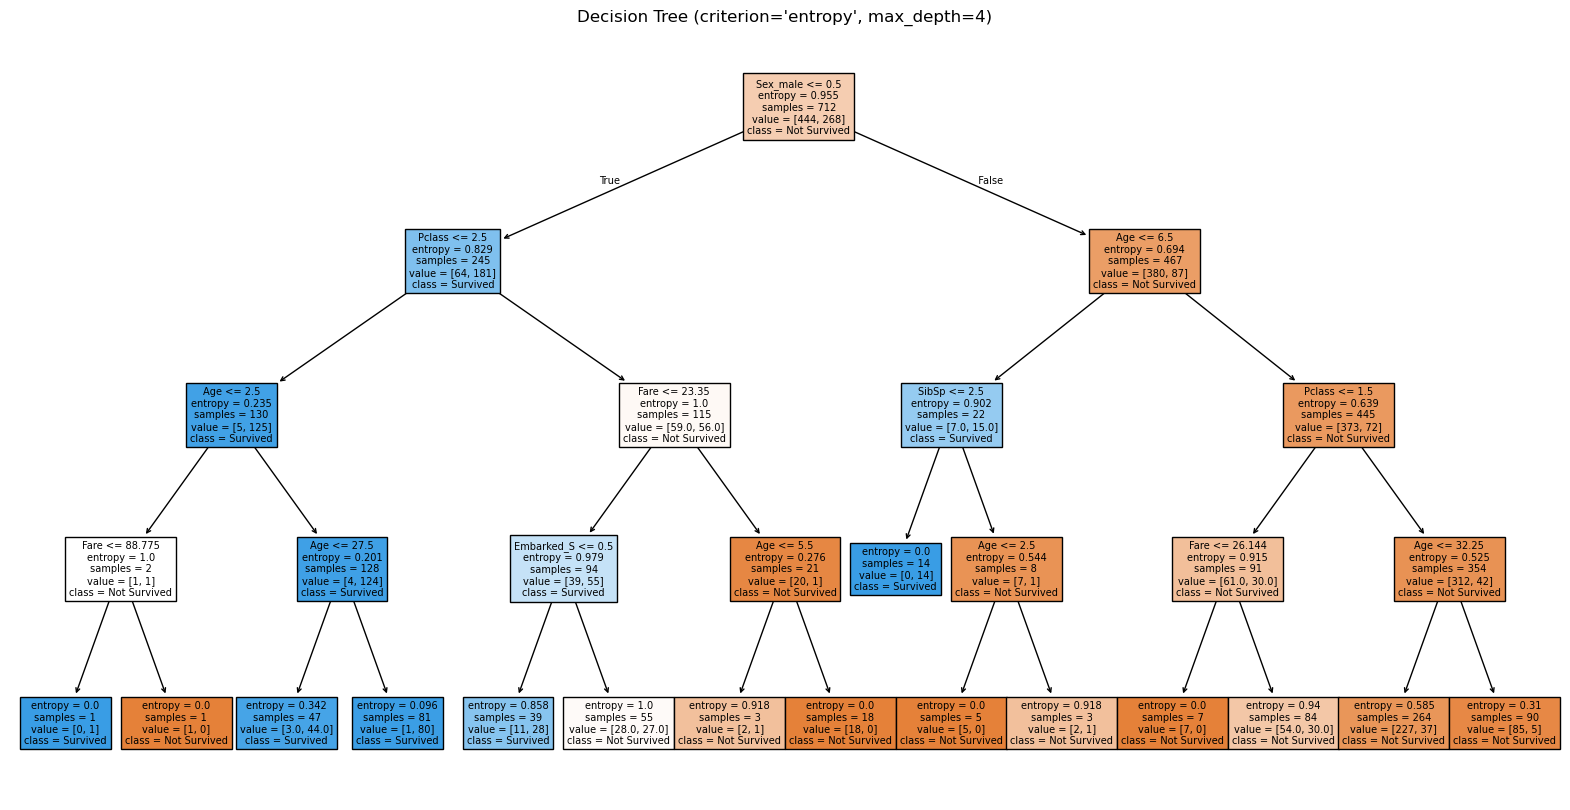

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived','Survived'], filled=True)
plt.title("Decision Tree (criterion='entropy', max_depth=4)")
plt.savefig("/mnt/data/titanic_tree.png", bbox_inches="tight")
plt.show()


In [17]:
import os
from pathlib import Path

print("Current working dir:", os.getcwd())
print("List top-level files/folders:", os.listdir('.'))
# Optional: see absolute path of notebook
print("Notebook path (cwd):", Path.cwd().resolve())


Current working dir: C:\Users\student
List top-level files/folders: ['.anaconda', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.matplotlib', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'exp_5.sql', 'Favorites', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{4acc6c0b-189c-11f0-9c5b-005056c00008}.TxR.0.regtrans-ms', 'NTUSER.DAT{4acc6c0b-189c-11f0-9c5b-005056c00008}.TxR.1.regtrans-ms', 'NTUSER.DAT{4acc6c0b-189c-11f0-9c5b-005056c00008}.TxR.2.regtrans-ms', 'NTUSER.DAT{4acc6c0b-189c-11f0-9c5b-005056c00008}.TxR.blf', 'NTUSER.DAT{4acc6c0c-189c-11f0-9c5b-005056c00008}.TM.blf', 'NTUSER.DAT{4acc6c0c-189c-11f0-9c5b-005056c00008}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{4acc6c0c-189c-11f0-9c5b-005056c00008}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'Pictures', 'PrintHo

In [18]:
from pathlib import Path

out_dir = Path.cwd() / "outputs"   # relative folder in current working dir
out_dir.mkdir(parents=True, exist_ok=True)  # creates if missing
tree_path = out_dir / "titanic_tree.png"
confusion_path = out_dir / "titanic_confusion.png"
print("Images will be saved to:", out_dir)


Images will be saved to: C:\Users\student\outputs


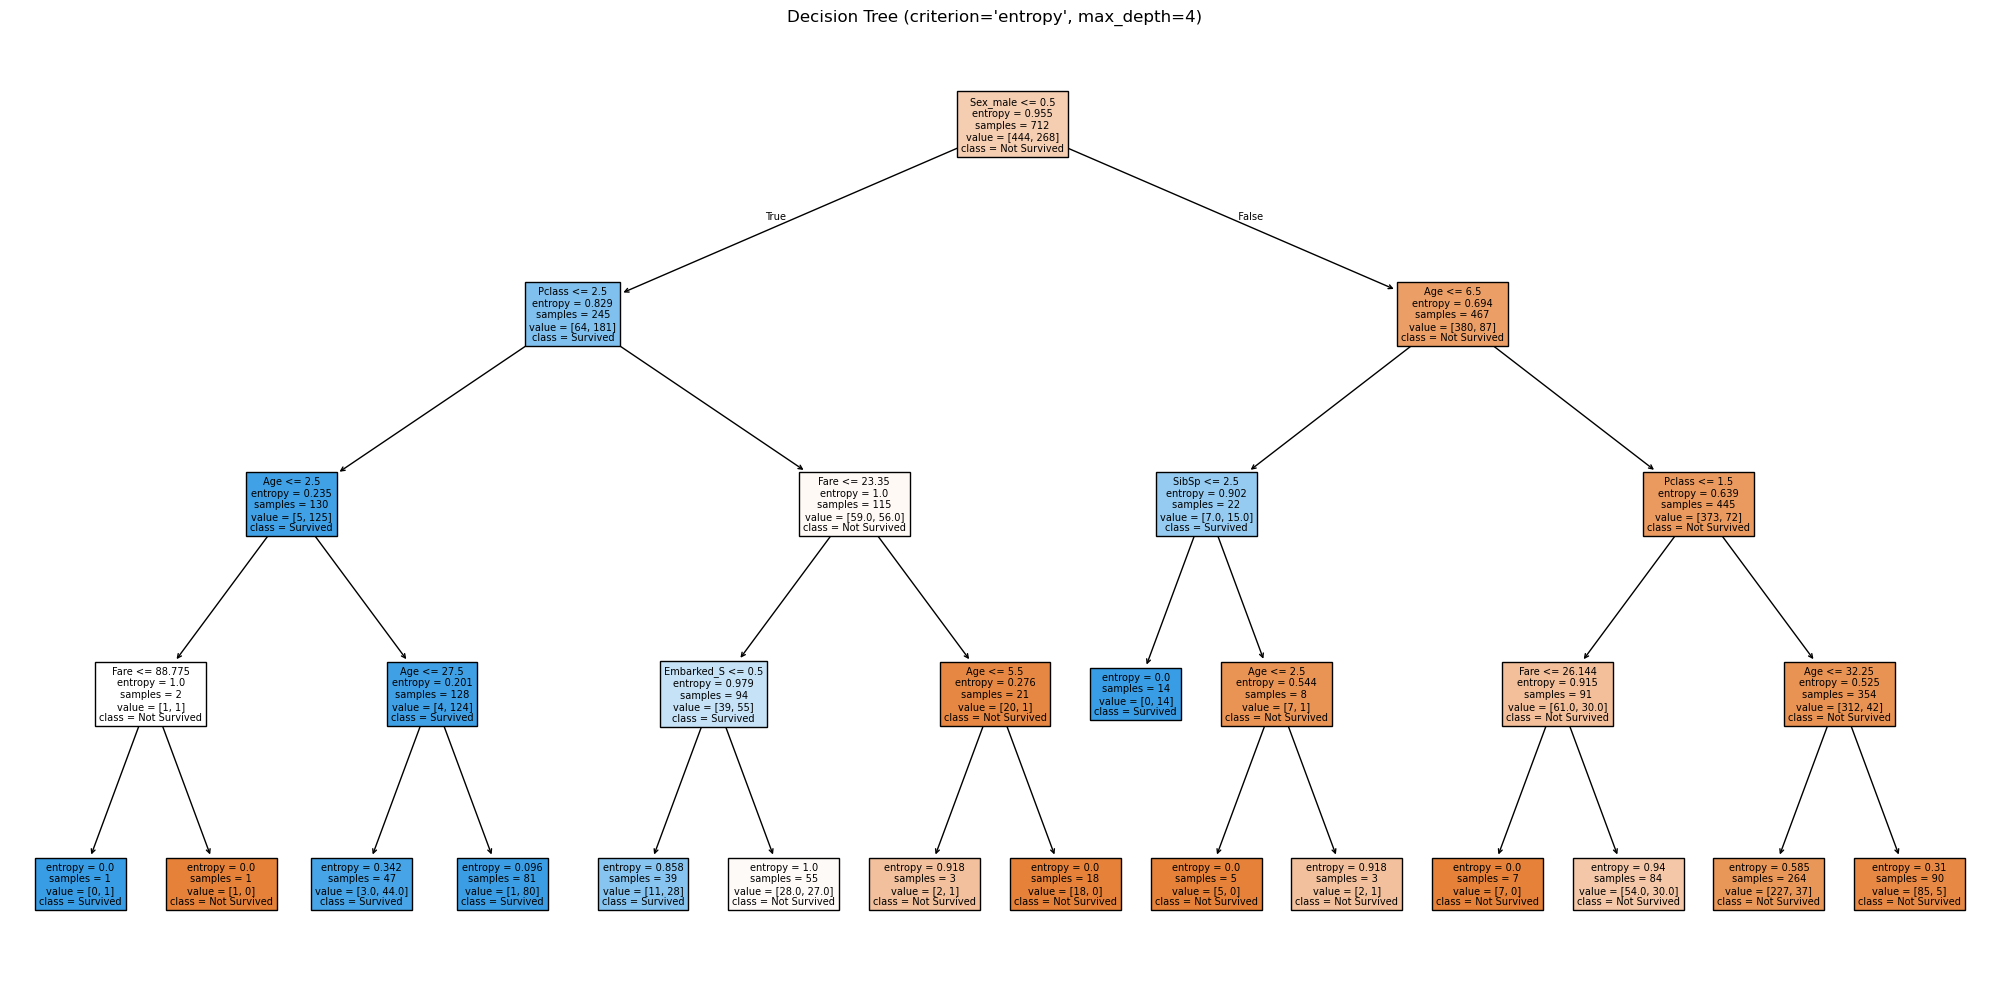

Saved tree to: C:\Users\student\outputs\titanic_tree.png


In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived','Survived'], filled=True)
plt.title("Decision Tree (criterion='entropy', max_depth=4)")
plt.tight_layout()
plt.savefig(str(tree_path), bbox_inches="tight")   # save to outputs/
plt.show()
print("Saved tree to:", tree_path)


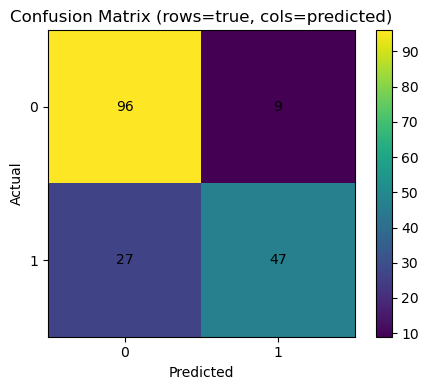

Saved confusion matrix to: C:\Users\student\outputs\titanic_confusion.png


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# (If you already have cm above, you can skip computing again)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (rows=true, cols=predicted)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0,1])
plt.yticks([0,1])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), ha='center', va='center')
plt.tight_layout()
plt.savefig(str(confusion_path), bbox_inches="tight")
plt.show()
print("Saved confusion matrix to:", confusion_path)


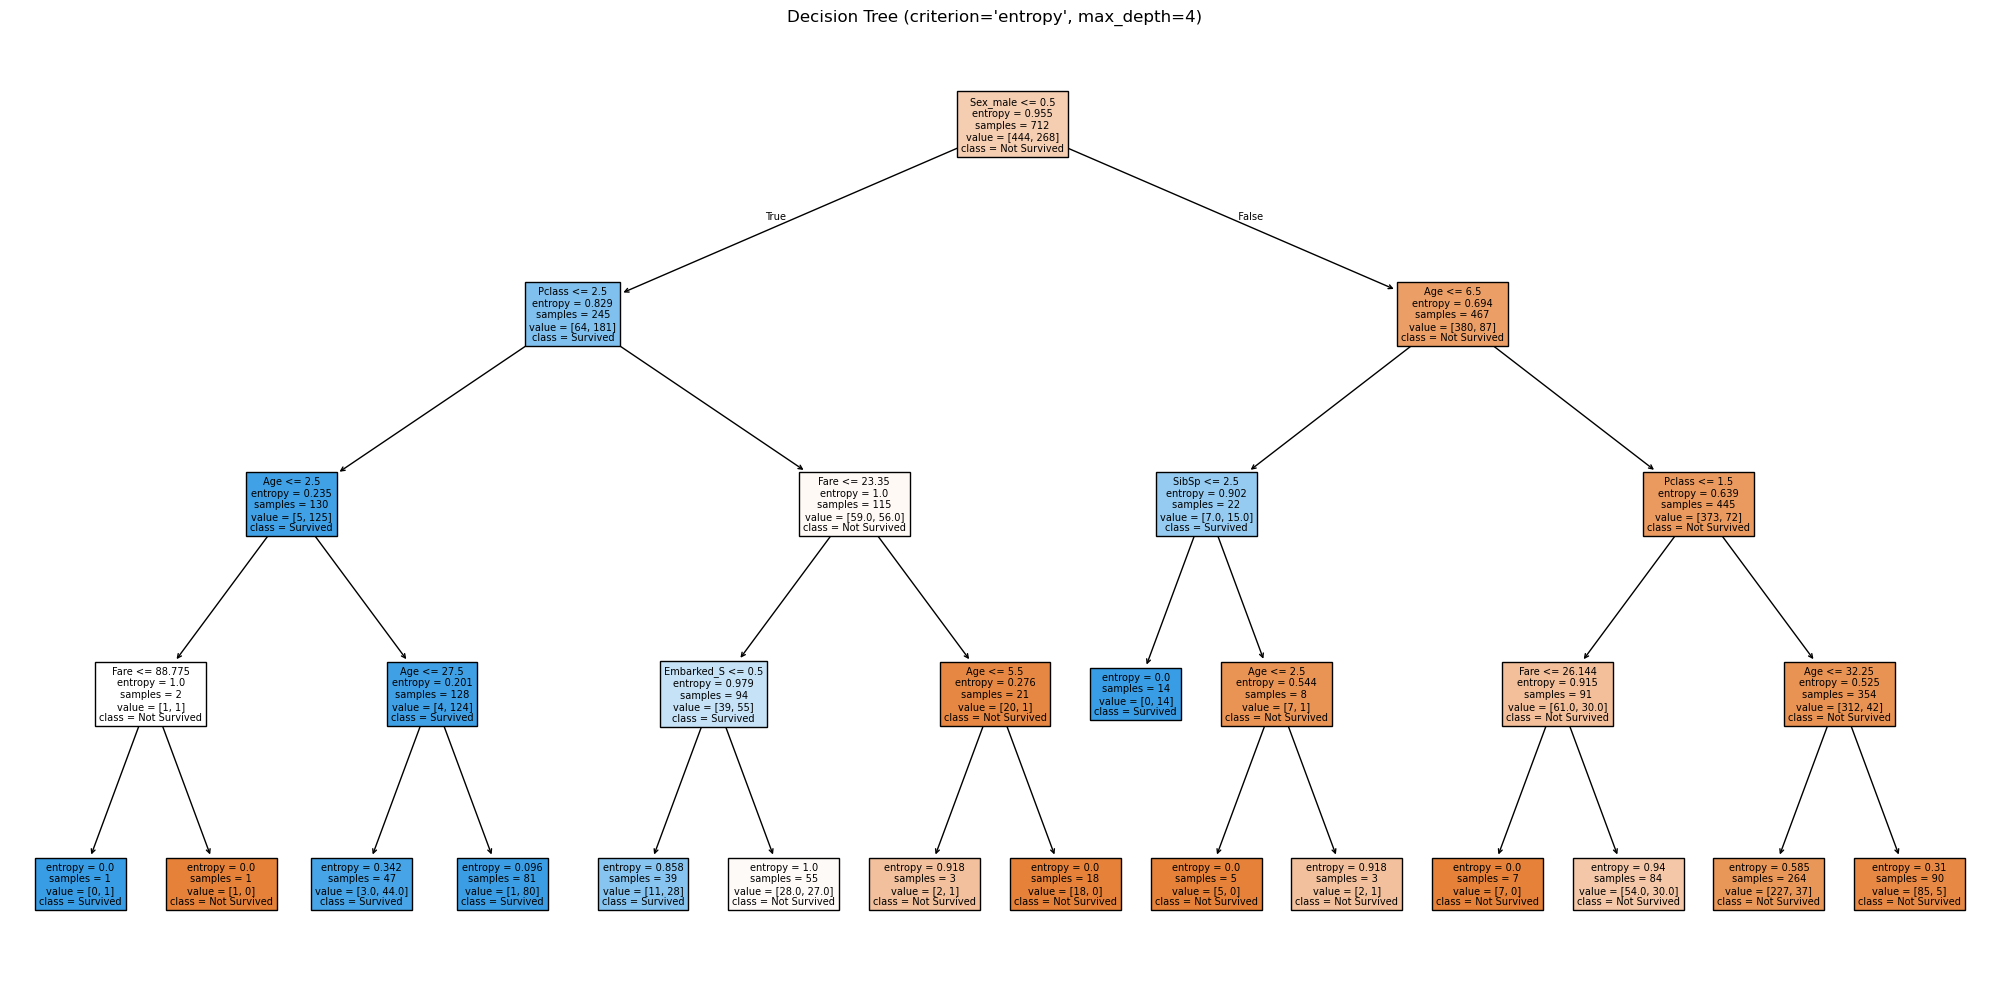

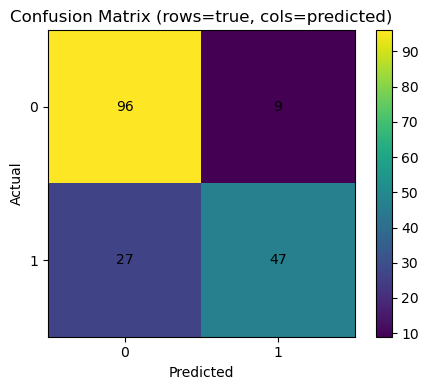

Files available at: C:\Users\student\outputs


In [21]:
from IPython.display import Image, display
display(Image(filename=str(tree_path)))
display(Image(filename=str(confusion_path)))
print("Files available at:", out_dir.resolve())
